## Thêm script vào workflow

- Thực thi custom scripts
    - Sử dụng run keyword trong workflow để thực thi custom scripts
    - Ví dụ như chạy script để cài đặt các gói cần thiết cho ứng dụng
- Tích hợp script với workflow
    - Đưa vào tham số cho script để điều chỉnh hành vi của script
    - Sử dụng environment variables để truy cập thông tin của workflow

VD:
```yaml
name: Flask App CI
on: [push, pull_request]
jobs:
    build:
        runs-on: ubuntu-latest
        steps:
            - uses: actions/checkout@v3
            - uses: actions/setup-python@v3
              with:
                python-version: '3.10'
                cache: 'pip'
            - run: |
                python -m pip install --upgrade pip
                pip install -r requirements.txt
```

## Mô tả cách để publish tới Github Packages sử dụng một workflow

- Workflow setup:
    - Upload package: Sử dụng actions/upload-artifact để upload package
    - Automation: Cho workflow một trigger để đẩy các sự kiện lên một cách tự động
- Điều chỉnh quan trọng:
    - Truy cập Repo: Sử dụng actions/checkout để truy cập vào repo và lấy thông tin cần thiết
    - Bảo mật: Sử dụng secret variable để bảo mật thông tin như token

VD:
```yaml
name: Fetch Github Package
on: [push, pull_request]
jobs:
    fetch-package:
        runs-on: ubuntu-latest
        steps:
          - uses: actions/checkout@v3

          - name: Setup Node.js
            uses: actions/setup-node@v3
            with:
              node-version: '14'
              registry-url: 'https://npm.pkg.github.com'

          - name: Install package
            run: npm install @owner/package-name
            env:
              NODE_AUTH_TOKEN: ${{secrets.GITHUB_TOKEN}}
```

## Mô tả cách làm thế nào để publish lên Github Container Registry sử dụng một workflow

- Xây dụng container image:
    - Sử dụng Docker để build container image trong workflow
    - Sử dụng docker/build-push-action để build và push image tới Github Container Registry
- Kích hoạt workflow:
    - Kích hoạt workflow đẩy các sự kiện để tái xây dựng và đẩy image lên code. Ta có thể set trigger theo thủ công hoặc trên một nhánh cụ thể
- Quản lý image versions:
    - Sử dụng tags để quản lý các phiên bản khác nhau của image

VD:
```yaml
name: Publish to GHCR
on: push
jobs:
    publish:
        runs-on: ubuntu-latest
        steps:
          - uses: actions/checkout@v3
          - name: Log in to GitHub Container Registry
            uses: docker/login-action@v2
            with:
              registry: ghcr.io
              username: ${{ github.actor }}
              password: ${{ secrets.GITHUB_TOKEN }}
          - name: Build and push Docker image
            uses: docker/build-push-action@v3
            with:
              context: .
              file: ./Dockerfile
              push: true
              tags: ghcr.io/${{ github.repository }}/your-image-name:latest
```

## Sử dụng cơ sở dữ liệu và service containers trong Github Actions workflow

- Database Container:
    - Sử dụng các công cụ như docker-compose để định nghĩa và quản lý như Postgres, MySQL, MongoDB
    - Khởi động container trước khi chạy test hoặc application
- Service Containers:
    - Sử dụng service containers để chạy các dịch vụ như Redis caching, web servers hoặc background workers
    - Sử dụng environment variables để điều chỉnh service connections trong workflow

VD:
```yaml
namee: DB Workflow
on: push
jobs:
    test:
        runs-on: ubuntu-latest
        services:
            postgres:
                image: postgres:latest
                env:
                    POSTGRES_USER: postgres
                    POSTGRES_PASSWORD: postgres
                    POSTGRES_DB: testdb
                ports:
                    - 5432:5432
        steps:
            - uses: actions/checkout@v3
            - run: |
                # Add commands to interact with the database
```

## Sử dụng label để định tuyến công việc cho các runner cụ thể

- Định nghĩa labels:
    - Thêm labels vào file workflow để phân biệt runner
    - Có thể dùng label trong các môi trường khác nhau, hệ điều hành, phiên bản
- Điều chỉnh self-hosted runner pools
    - Tạo các runner pools với các tinh chỉnh cụ thể và gán label cho chúng
    - Điều này cho phép quản lý tài nguyên và đảm bảo workflow chạy trên runner phù hợp
- Routing examples:
    - Sử dụng labels để chạy workflow trên các runner cụ thể như GPU cho machine learning, Windows cho .NET

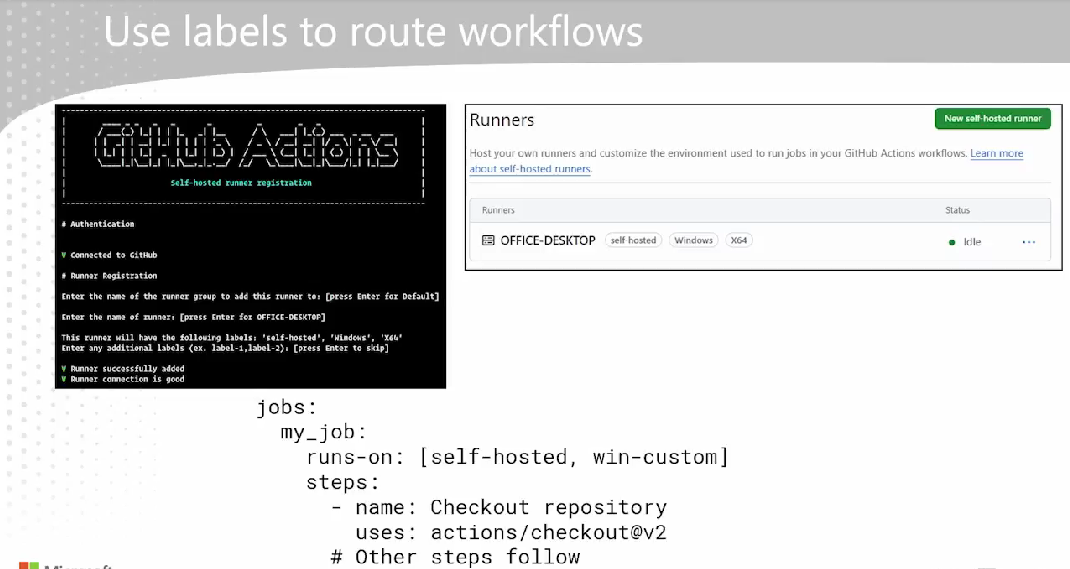

## Sử dụng CodeQL như một step trong workflow

- CodeQL:
    - CodeQL là công cụ phân tích mã nguồn để tìm lỗi bảo mật và bug
    - Sử dụng CodeQL trong workflow để phát hiện lỗi và cải thiện chất lượng mã nguồn (github/codeql-action)
- Phân tích điều chỉnh:
    - Chỉ định ngôn ngữ và CodeQL packs dùng cho phân tích
    - Có thể điều chỉnh cấu hình phân tích như bỏ qua các file hoặc cấu hình báo cáo
- Reporting:
    - Xem xét CodeQL findings và báo cáo trong workflow

## Cách xuất bản một thành phần dưới dạng GitHub release bằng GitHub Actions

- Release workflow
    - Sử dụng actions/create-release để tạo release với các thông tin như tag, tên, nội dung
    - Trigger workflow trên sự kiện release
- Tạo ra release notes:
    - Dùng công cụ conventional-changelog để tạo ra release notes tự động dựa trên commit và issue tracker

- Quản lý assets
    - Upload các file liên quan như binaries, docs, changelog,...

VD:
```yaml
jobs:
    release:
        runs-on: ubuntu-latest
        steps:
          - name: Create a release
            uses: actions/create-release@v2
            with:
              tag_name: v1.0.0
              release_name: Release 1.0.0
              body: |
                Changes in this Release
                - Feature 1
                - Feature 2
              draft: false # Set to true to create a draft release (stage it)

## Deploy release tới cloud provider sử dụng GitHub Actions

- Cloud platform integration:
    - Sử dụng ARM và Bicep để tự động hóa việc deploy tới Azure
    - Dùng công cụ như Azure CLI để tương tác với các tác vụ cụ thể
- Trigger deployment
    - Kích hoạt workflow trên sự kiện release hoặc push
    - Có thể trigger thủ công hoặc trên một tag cụ thể
- Manage environment:
    - Sử dụng workflow khác nhau hoặc env variables để quản lý các môi trường khác nhau như staging, production

VD: Với AWS
```yaml
jobs:
    deploy:
        runs-on: ubuntu-latest
        steps:
            - uses: actions/checkout@v3
            - name: Login to AWS
              if: env.DEPLOY_TARGET == 'aws'
              uses: aws-actions/configure-aws-credentials@v2
              with:
                aws-access-key-id: ${{ secrets.AWS_ACCESS_KEY_ID }}
                aws-secret-access-key: ${{ secrets.AWS_SECRET_ACCESS_KEY }}
                aws-region: ${{ secrets.AWS_REGION }}
            - name: Deploy the application to AWS
                if: env.DEPLOY_TARGET == 'aws'
                run: aws deploy --application-name ${{ env.APP_NAME }} --region ${{ secrets.AWS_REGION }} --version ${{github.sha}}
```

VD với Azure:
```yaml
jobs:
    deploy:
        runs-on: ubuntu-latest
        steps:
            - uses: actions/checkout@v3
            - name: Login to Azure
              if: env.DEPLOY_TARGET == 'azure'
              uses: azure/login@v1
              with:
                creds: ${{ secrets.AZURE_CREDENTIALS }}
            - name: Deploy the application to Azure
              if: env.DEPLOY_TARGET == 'azure'
              run: az webapp deployment create --resource-group ${{ secrets.AZURE_RESOURCE_GROUP }} --name ${{ secrets.AZURE_APP_NAME }} --slot ${{ secrets.AZURE_SLOT }} --source ${{github.sha}}